<a href="https://colab.research.google.com/github/arka57/CNN/blob/main/CNN4_LeNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implementing LeNet on MNIST dataset of handwritten digit detection

In [ ]:
#importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Downloading data and using the dataloader

In [3]:


train=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(train,batch_size=128,shuffle=True)
test=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(test,batch_size=128,shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#LeNet Model

In [26]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model=nn.Sequential(
            nn.Conv2d(1,6,(5,5)),                  #(1,28,28)----> (6,24,24)
            nn.AvgPool2d(2,stride=(2,2)),         #(6,24,2)----> (6,12,12)
            nn.ReLU(),
            nn.Conv2d(6,16,(5,5)),                 #(6,12,12)----> (16,8,8)
            nn.AvgPool2d(2,stride=(2,2)),           #(16,8,8)---->(16,4,4)
            nn.ReLU()
        )

        self.fc_model=nn.Sequential(
            nn.Linear(256,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)

        )

    def forward(self,x):
       #print(x.shape) 
       x=self.cnn_model(x)
       #print(x.shape)
       x=x.view(x.size(0),-1)
       #print(x.shape)
       x=self.fc_model(x)
       #print(x.shape)
       return x     

In [ ]:
#instantiating network and other necessitites

In [27]:
net=LeNet()
opt=optim.Adam(net.parameters(),weight_decay=0.01)
loss_fn=nn.CrossEntropyLoss()

In [ ]:
#Evaluation 

In [28]:
def evaluation(dataloader):
    total=0
    correct=0
    for i in dataloader:
        images,labels=i
        output=net(images)
        _,pred=torch.max(output,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()
    return (correct/total)*100

In [ ]:
#learning algo

Epoch 0/16 ,Training accuracy 91.13,Test Accuracy 91.40
Epoch 1/16 ,Training accuracy 93.68,Test Accuracy 93.88
Epoch 2/16 ,Training accuracy 93.96,Test Accuracy 94.51
Epoch 3/16 ,Training accuracy 95.45,Test Accuracy 95.71
Epoch 4/16 ,Training accuracy 94.59,Test Accuracy 94.77
Epoch 5/16 ,Training accuracy 95.87,Test Accuracy 96.19
Epoch 6/16 ,Training accuracy 95.92,Test Accuracy 96.16
Epoch 7/16 ,Training accuracy 96.15,Test Accuracy 96.28
Epoch 8/16 ,Training accuracy 95.62,Test Accuracy 95.46
Epoch 9/16 ,Training accuracy 95.84,Test Accuracy 95.94
Epoch 10/16 ,Training accuracy 95.79,Test Accuracy 96.20
Epoch 11/16 ,Training accuracy 96.60,Test Accuracy 96.59
Epoch 12/16 ,Training accuracy 95.97,Test Accuracy 96.05
Epoch 13/16 ,Training accuracy 96.16,Test Accuracy 96.21
Epoch 14/16 ,Training accuracy 95.90,Test Accuracy 95.98
Epoch 15/16 ,Training accuracy 95.93,Test Accuracy 96.16


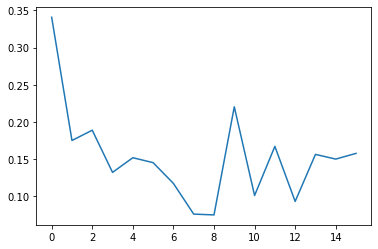

In [29]:
loss_epoch=[]
epoch=16

for i in range(epoch):

    for _,data in enumerate(trainloader,0):
        images,labels=data
        output=net(images)
        loss=loss_fn(output,labels)

        loss.backward()

        opt.step()
        opt.zero_grad()
    loss_epoch.append(loss.item())    
    print('Epoch %d/%d ,Training accuracy %0.2f,Test Accuracy %0.2f' %(i,epoch,evaluation(trainloader),evaluation(testloader)))
plt.plot(loss_epoch)
plt.show()        
